# pandas数据处理

## 行索引原理
### 什么是行索引？
默认的行索引是表格左侧的123456...（如下图）
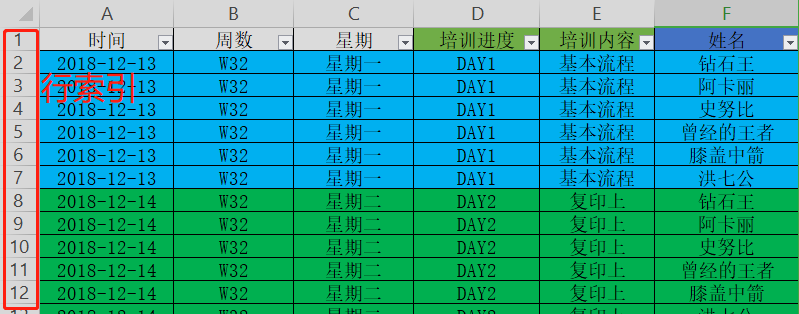

通过data.set_index('xxx')可以将其它列名称设置未行行索引。并且可以通过loc功能筛选出行索引中的关键字（如下图）

data2=data1.set_index('星期').loc['星期一']
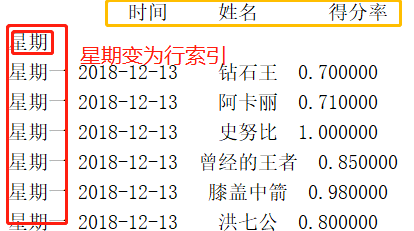

### 如何恢复成默认的索引？
* data2.reset_index()
* data2.reset_index(drop=True)#将当前索引变为默认索引

### 为何某一列设置为行索引后，通过重复筛选那一列内容会丢失？
data2=data1.set_index('星期').loc['星期一'].set_index('时间').loc['2018-12-13']
#### 这段代码设置第一次筛选设置为“星期”，然后第二次筛选后，“星期”这一列的索引会被丢弃。正确的代码需要用到.reset_index()，如下：
data2=data1.set_index('星期').loc['星期一'].reset_index().set_index('时间').loc['2018-12-13'].reset_index()#每次筛选都要用到.reset_index()恢复行索引

### ix索引功能在新版本中将不再被支持！
* 官方文档：http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
* 新的索引方法：

data[0:3]#获取0,1,2行内容
data[[0:3]]#获取0,1,2列
data['星期','分数']#获取列
### .iloc定位索引。
* data.iloc[2]#获取第2行的内容
* data.iloc[0:3]#获取0到3行的内容
* data.iloc[:,[2]]#获取第2列的内容
* data.iloc[[0,3],[3]]#获取第3列的第0、第3行内容
* data.iloc[[0, 2], data.columns.get_indexer(['姓名', '分数'])]#获取姓名、分数列第0和第2行内容


* data.columns.get_indexer(['姓名', '分数'])#获取'姓名'、 '分数'列的位置

### .loc标记索引。
* .loc[data.index[[0,1,4]],'星期']#获取索引为“星期”的第1、第2和第5行内容
* 筛选某一列数据 
    data_c1=data.set_index('星期')#设置索引列
    data_c2=data_c1.loc['星期一']#获得所有星期一的数据
    data_c3=data_c1.loc['星期一','分数']#只获取两列内容
* data.loc[0:3,['姓名','分数']]#获取索引列的第0到第3行。
特殊用法：
loc和iloc中可以用条件判断。需要后续测试，一直报错。。
https://blog.csdn.net/weixin_39501270/article/details/76833836

### 删除行
* data.drop([1,2], axis=0)#删除第1行和第2行

In [2]:
import pandas as pd
data=pd.read_excel(r"D:\design\jupyterNotebook\文档的自动化操作/EXCEL数据处理-pandas/file/员工综合素质评价表.xlsx",'顽皮的狗')
data1=data.iloc[:,[2]]#获取第3列的内容
data2=data.loc[:,'星期']#获取索引位星期的内容.与上面方法相同
# print(data1)
# print(data2)

内容比较多，贴上效果图，上面两个方法的效果是一样的。
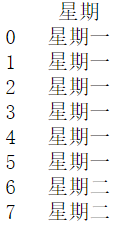

In [3]:
#获取单列内容
data1=data.iloc[data.index[[0,1,4]],[2]]#获取第2列的第1、第2和第5行内容
data2=data.loc[data.index[[0,1,4]],'星期']#获取索引为“星期”的第1、第2和第5行内容
data3=data.loc[data.index[0:4],'星期']
data4=data.iloc[0:4,2]
print('data1:\n',data1)
print('data2:\n',data2)
print('data3:\n',data3)
print('data4:\n',data4)

data1:
     星期
0  星期一
1  星期一
4  星期一
data2:
 0    星期一
1    星期一
4    星期一
Name: 星期, dtype: object
data3:
 0    星期一
1    星期一
2    星期一
3    星期一
Name: 星期, dtype: object
data4:
 0    星期一
1    星期一
2    星期一
3    星期一
Name: 星期, dtype: object


只获取值

In [4]:
l=data.iloc[0:4,2].values[0]
print(l)

星期一


In [5]:
#获取多列内容
data3=data.iloc[[0, 4], data.columns.get_indexer(['姓名', '分数'])]
print(data3)

     姓名  分数
0   钻石王  70
4  膝盖中箭  98


In [6]:
#获取多行内容
data3=data.iloc[[0, 4], data.columns.get_indexer(['姓名', '分数'])]
print(data3,'\n------')
data_copy=data.loc[:,['姓名','培训进度']]
data3=data_copy.loc[data_copy['培训进度'].isin(['DAY1','DAY2'])]
print(data3)

     姓名  分数
0   钻石王  70
4  膝盖中箭  98 
------
       姓名  培训进度
0     钻石王  DAY1
1     阿卡丽  DAY1
2     史努比  DAY1
3   曾经的王者  DAY1
4    膝盖中箭  DAY1
5     洪七公  DAY1
6     钻石王  DAY2
7     阿卡丽  DAY2
8     史努比  DAY2
9   曾经的王者  DAY2
10   膝盖中箭  DAY2
11    洪七公  DAY2
30    钻石王  DAY1
31    阿卡丽  DAY1
32    史努比  DAY1
33  曾经的王者  DAY1
34   膝盖中箭  DAY1
35    洪七公  DAY1


In [7]:
#data1=data.loc[data['得分率']>0.7]
data_copy=data.loc[:,['姓名','及格率']]
data1=data_copy.loc[data['及格率']>0.9]
print(data1)

Empty DataFrame
Columns: [姓名, 及格率]
Index: []
